In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

%matplotlib inline

# Some plot styling preferences
plt.style.use('seaborn-whitegrid')
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 14}

mpl.rc('font', **font)

</H> Ho: a0=a1
     H1: a0!=a1
     where a and a1 stands for the conversion rate of the new and old design, respectively. I ll also set a **confidence level of 95%** </H>

In [2]:
effect_size = sms.proportion_effectsize(0.10, 0.12)    # Calculating effect size based on our expected rates

required_n = sms.NormalIndPower().solve_power(
    effect_size, 
    power=0.8, 
    alpha=0.05, 
    ratio=1
    )                                                  # Calculating sample size needed

required_n = ceil(required_n)                          # Rounding up to next whole number                          

print(required_n)

3835


In [3]:
df = pd.read_csv('AdSmartABdata - AdSmartABdata.csv')

df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [5]:

session_counts = df['auction_id'].value_counts(ascending=False)
multi_users = session_counts[session_counts > 1].count()

print(f'There are {multi_users} users that appear multiple times in the dataset')

There are 0 users that appear multiple times in the dataset


In [6]:
control_sample = df[df['experiment'] == 'control'].sample(n=required_n, random_state=22)
treatment_sample = df[df['experiment'] == 'exposed'].sample(n=required_n, random_state=22)

ab_test = pd.concat([control_sample, treatment_sample], axis=0)
ab_test.reset_index(drop=True, inplace=True)

In [7]:
ab_test

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,e1d49107-f02f-4e09-8750-b22ae05d841d,control,2020-07-06,6,Generic Smartphone,6,Chrome Mobile,0,0
1,8b39c872-00f5-4278-9f0f-f8a096f4d076,control,2020-07-09,6,Generic Smartphone,6,Chrome Mobile,0,0
2,6d39d727-e406-4aee-acd9-6ce280018c73,control,2020-07-04,6,Generic Smartphone,6,Chrome Mobile,0,0
3,e44b9ba2-9a29-4477-a6ee-4913293a1a8b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
4,9839dfb9-13ee-4361-85f6-7e132ce30396,control,2020-07-03,15,Samsung SM-G980F,6,Facebook,0,1
...,...,...,...,...,...,...,...,...,...
7665,70c3bab6-c898-42d9-bdec-9395900da3fe,exposed,2020-07-09,8,Samsung SM-J330FN,6,Chrome Mobile WebView,0,0
7666,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
7667,86fb7f15-b06d-4336-b89a-f791686f5633,exposed,2020-07-10,14,Samsung SM-G955F,6,Samsung Internet,0,0
7668,680dd8d2-7694-452f-9a80-d86e2f5f5277,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,0,0


In [8]:
ab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   7670 non-null   object
 1   experiment   7670 non-null   object
 2   date         7670 non-null   object
 3   hour         7670 non-null   int64 
 4   device_make  7670 non-null   object
 5   platform_os  7670 non-null   int64 
 6   browser      7670 non-null   object
 7   yes          7670 non-null   int64 
 8   no           7670 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 539.4+ KB


In [9]:
ab_test['experiment'].value_counts()

control    3835
exposed    3835
Name: experiment, dtype: int64

In [10]:
ab_test["converted"]=ab_test["yes"]+ab_test["no"]

In [11]:
ab_test.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,converted
0,e1d49107-f02f-4e09-8750-b22ae05d841d,control,2020-07-06,6,Generic Smartphone,6,Chrome Mobile,0,0,0
1,8b39c872-00f5-4278-9f0f-f8a096f4d076,control,2020-07-09,6,Generic Smartphone,6,Chrome Mobile,0,0,0
2,6d39d727-e406-4aee-acd9-6ce280018c73,control,2020-07-04,6,Generic Smartphone,6,Chrome Mobile,0,0,0
3,e44b9ba2-9a29-4477-a6ee-4913293a1a8b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,0
4,9839dfb9-13ee-4361-85f6-7e132ce30396,control,2020-07-03,15,Samsung SM-G980F,6,Facebook,0,1,1


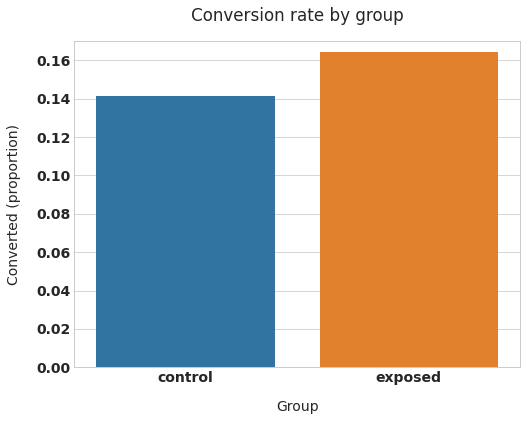

In [12]:
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test['experiment'], y=ab_test['converted'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15);

In [13]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [14]:
control_results = ab_test[ab_test['experiment'] == 'control']['converted']
treatment_results = ab_test[ab_test['experiment'] == 'exposed']['converted']

In [15]:
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: -2.82
p-value: 0.005
ci 95% for control group: [0.130, 0.152]
ci 95% for treatment group: [0.153, 0.176]


</H> Since our p value is less than 5% we can reject the null hypothesis and accept the alternate hypothesis</H>